# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

cities

Number of cities in the list: 594


['lompoc',
 'alice springs',
 'isafjordur',
 'irymple',
 'mary',
 'piti village',
 'ilulissat',
 'college',
 'tvoroyri',
 'blackmans bay',
 'guerrero negro',
 'arraial do cabo',
 'stanley',
 'iqaluit',
 'pandan',
 'port-aux-francais',
 'adamstown',
 'jizzax',
 'thinadhoo',
 'naze',
 'kapuskasing',
 'bethel',
 'albany',
 'saldanha',
 'huntsville',
 'tabas',
 'kingston',
 'port mathurin',
 'kuanda',
 'margaret river',
 'nizhnedevitsk',
 'queimadas',
 'hawaiian paradise park',
 'saint-pierre',
 'west island',
 'cabo san lucas',
 'puerto natales',
 'ushuaia',
 'badger',
 'palikir - national government center',
 'ola',
 'avarua',
 'cargados carajos',
 'qamdo',
 'grytviken',
 'kirakira',
 'colleyville',
 'udachny',
 'tiksi',
 'papatowai',
 'punta arenas',
 'tolanaro',
 'bilibino',
 'mejit',
 'kodiak',
 'bredasdorp',
 'jamestown',
 'afaahiti',
 'port augusta',
 'whitehorse',
 'edinburgh of the seven seas',
 'minas de marcona',
 'thompson',
 "kapa'a",
 'taiohae',
 'la passe',
 'sambava',
 'ata

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = f' https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'https://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=metric'
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat =city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | lompoc
Processing Record 2 of Set 1 | alice springs
Processing Record 3 of Set 1 | isafjordur
Processing Record 4 of Set 1 | irymple
Processing Record 5 of Set 1 | mary
Processing Record 6 of Set 1 | piti village
Processing Record 7 of Set 1 | ilulissat
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | tvoroyri
Processing Record 10 of Set 1 | blackmans bay
Processing Record 11 of Set 1 | guerrero negro
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | stanley
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | pandan
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | adamstown
Processing Record 18 of Set 1 | jizzax
Processing Record 19 of Set 1 | thinadhoo
Processing Record 20 of Set 1 | naze
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | bethel
Processing Record 23 of

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          569
Lat           569
Lng           569
Max Temp      569
Humidity      569
Cloudiness    569
Wind Speed    569
Country       569
Date          569
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,lompoc,34.6391,-120.4579,18.85,55,0,2.68,US,1699550126
1,alice springs,-23.7000,133.8833,18.75,48,76,3.09,AU,1699549991
2,isafjordur,66.0755,-23.1240,4.02,65,75,8.23,IS,1699550108
3,irymple,-34.2500,142.1667,20.59,36,1,3.11,AU,1699550240
4,mary,37.0000,62.5000,14.04,33,89,6.39,TM,1699550240


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,18.85,55,0,2.68,US,1699550126
1,alice springs,-23.7000,133.8833,18.75,48,76,3.09,AU,1699549991
2,isafjordur,66.0755,-23.1240,4.02,65,75,8.23,IS,1699550108
3,irymple,-34.2500,142.1667,20.59,36,1,3.11,AU,1699550240
4,mary,37.0000,62.5000,14.04,33,89,6.39,TM,1699550240


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

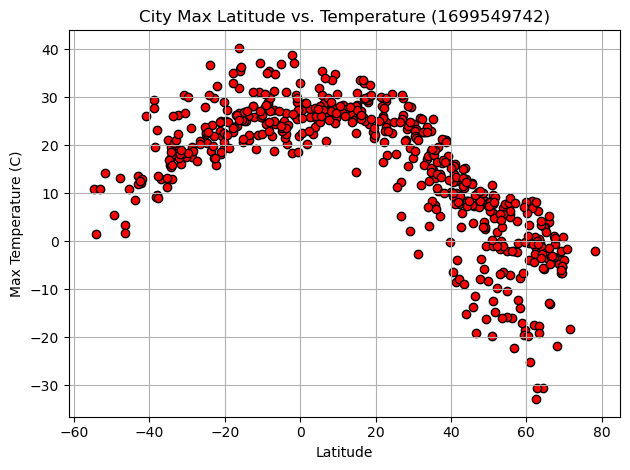

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], marker="o", facecolors="r", edgecolors="k")

# Incorporate the other graph properties
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
date=city_data_df['Date'].min()
plt.title(f"City Max Latitude vs. Temperature ({date})")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

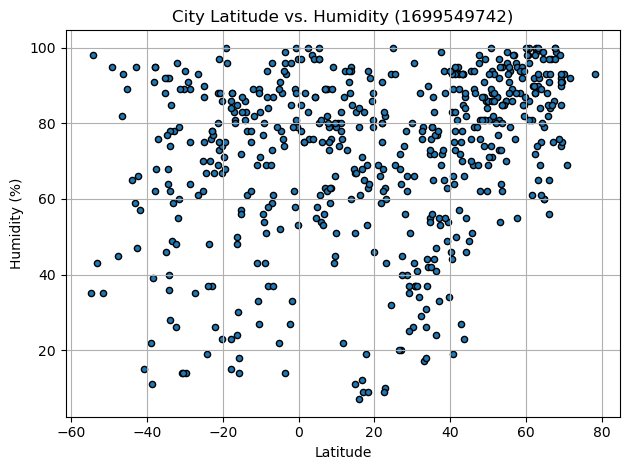

In [21]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind='scatter', x='Lat', y='Humidity', marker='o', grid=True,\
                  facecolors='b', edgecolors='k', title=f'City Latitude vs. Humidity ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

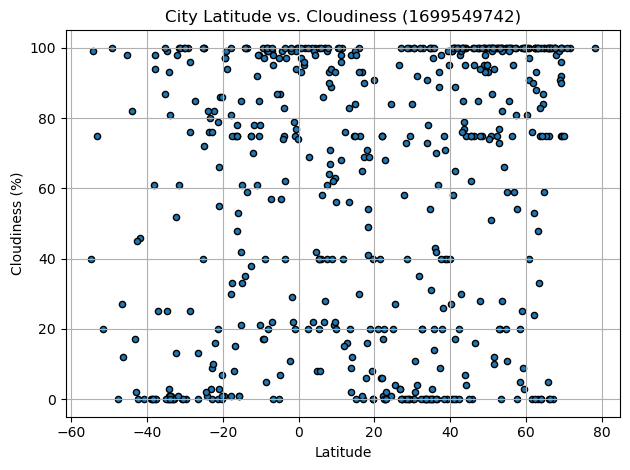

In [22]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind='scatter', x='Lat', y='Cloudiness', marker='o', grid=True,\
                  facecolors='r', edgecolors='k', title=f'City Latitude vs. Cloudiness ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

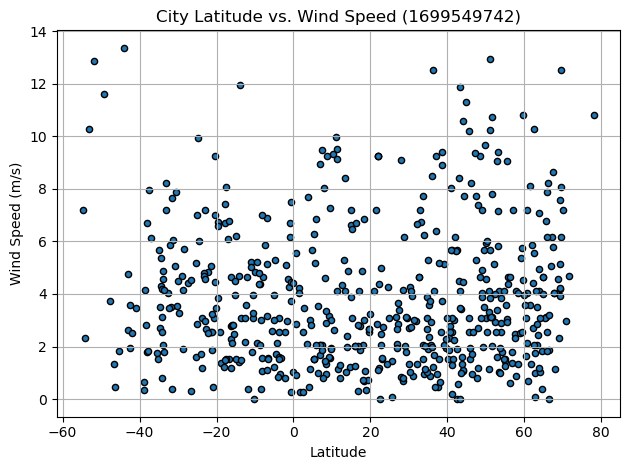

In [23]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind='scatter', x='Lat', y='Wind Speed', marker='o', grid=True,\
                  facecolors='r', edgecolors='k', title=f'City Latitude vs. Wind Speed ({date})')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.tight_layout()

# Save the figure
plt.savefig("/Users/guoyalong/Desktop/homework/python-api-challenge/WeatherPy/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [46]:
# Define a function to create Linear Regression plots
def linear_regress(x, y, eqn_coordinates):
    r = stats.pearsonr(x, y)
    print(f"The r-value is: {r[0]}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y ={slope: .2f}x +{intercept: .2f}"
    plt.plot(x, regress_values, "r-")
    plt.annotate(line_eq, eqn_coordinates, fontsize=12, color="red")
    plt.scatter(x, y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,lompoc,34.6391,-120.4579,18.85,55,0,2.68,US,1699550126
2,isafjordur,66.0755,-23.1240,4.02,65,75,8.23,IS,1699550108
4,mary,37.0000,62.5000,14.04,33,89,6.39,TM,1699550240
5,piti village,13.4626,144.6933,28.03,88,20,4.12,GU,1699550241
6,ilulissat,69.2167,-51.1000,-1.99,74,75,5.14,GL,1699550242


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']< 0,:]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,alice springs,-23.7000,133.8833,18.75,48,76,3.09,AU,1699549991
3,irymple,-34.2500,142.1667,20.59,36,1,3.11,AU,1699550240
9,blackmans bay,-43.0167,147.3167,13.62,95,2,2.64,AU,1699550243
11,arraial do cabo,-22.9661,-42.0278,29.92,37,0,7.20,BR,1699550245
15,port-aux-francais,-49.3500,70.2167,5.47,95,100,11.61,TF,1699550247


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8450020376569587


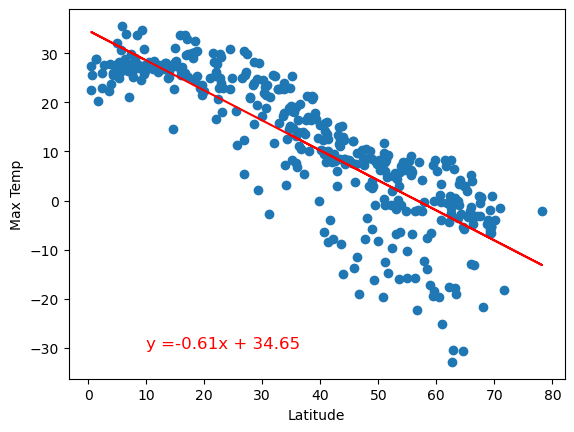

In [49]:
# Linear regression on Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Max Temp"], (10, -30))

The r-value is: 0.672489866522005


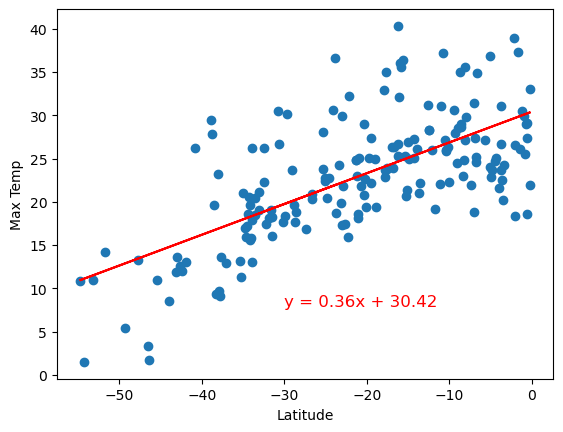

In [50]:
# Linear regression on Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Max Temp"], (-30, 8))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.29835844887431007


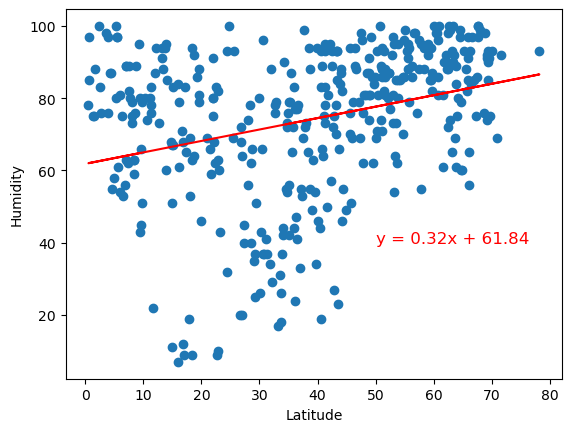

In [51]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Humidity"], (50, 40))

The r-value is: 0.1149006675874116


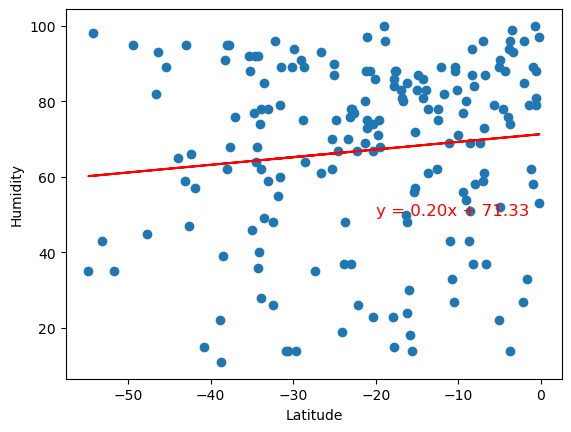

In [52]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Humidity"], (-20, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2107018577631135


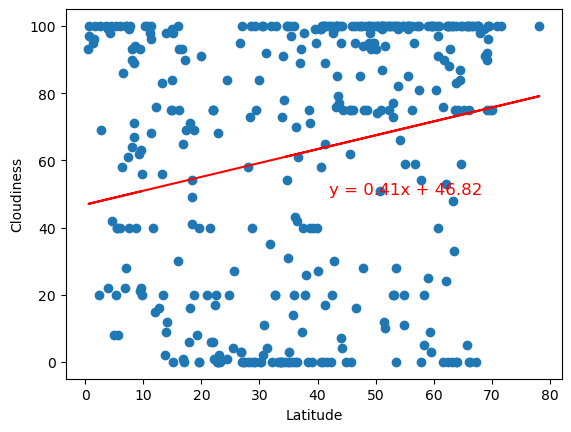

In [53]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Cloudiness"], (42, 50))

The r-value is: 0.2867929981549416


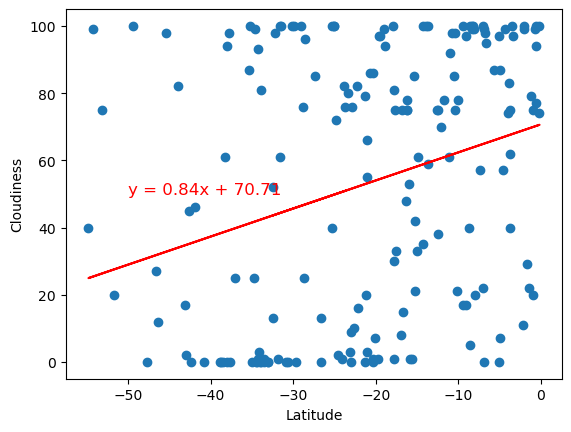

In [54]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Cloudiness"], (-50, 50))

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1287714794597003


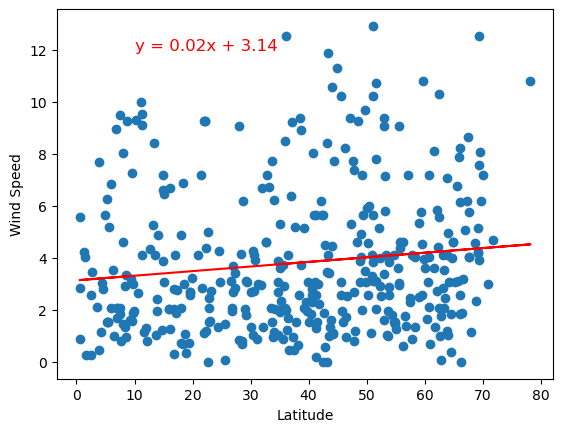

In [55]:
# Northern Hemisphere
linear_regress(northern_hemi_df["Lat"].rename("Latitude"), northern_hemi_df["Wind Speed"], (10, 12))

The r-value is: -0.20784558514448473


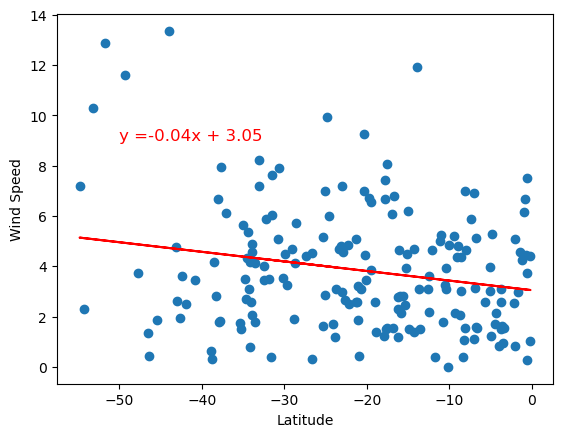

In [56]:
# Southern Hemisphere
linear_regress(southern_hemi_df["Lat"].rename("Latitude"), southern_hemi_df["Wind Speed"], (-50, 9))

**Discussion about the linear relationship:** YOUR RESPONSE HERE